In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thakrav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thakrav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thakrav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/thakrav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import os
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict, combine_multiple_text_files


In [3]:
%load_ext autoreload
%autoreload 2

## House of Dragon Seasons

In [4]:
hod_root_data_path = "../data/processed-data/url-texts/house-of-dragons"
directories = ["characters", "episodes", "dragons", "differences"]

### Episodes

In [5]:
directories_key = 'episodes'

data_text_dir = create_dir("../data/processed-data", "clean-csvs")

data_dir = os.path.join(hod_root_data_path, directories_key)
txt_file = combine_multiple_text_files(data_dir)
raw_paragraphs = {}
with open(txt_file, "rt") as f:
    for i, line in enumerate(f):
        raw_paragraphs[i] = line
styled_print(f"Found Total {len(raw_paragraphs)} Paragraphs from the {directories_key}", header=True)

› creating directory ... ../data/processed-data/clean-csvs
› Found Total 1222 Paragraphs from the episodes


In [6]:
data_df = pd.DataFrame(raw_paragraphs.items(), columns=["id", "paragraphs"])
data_df.to_csv(os.path.join(data_text_dir, f"{directories_key}-raw-paragraphs.csv"), index=False, header=True)

In [7]:
styled_print(f"Some Sample Paragraphs from the {directories_key}", header=True)
sampled_paragraphs = random_select_dict(raw_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Paragraphs from the episodes
    › 245 - - ↑ https://www.instagram.com/p/CgyqNtnq1Sk/?igshid=YmMyMTA2M2Y=

    › 920 - - In contrast, this episode wholly uses Eustace's version for how Rhaenyra and Criston broke up (other than that Eustace never said they had sex). Eustace said that Criston was smitten with Rhaenyra and begged her to run away with him into exile, but she rejected his offer of marriage due to her duty to the throne. The book version goes on to have Rhaenyra point out that if Criston would abandon his vow as a Kingsguard, she couldn't trust that a marriage vow would mean much to him. The only difference is that in the book Criston snuck into Rhaenyra's chambers to profess his love, while in the TV show he does it on their boat as they return from Driftmark. Mushroom's alternate version of these events is that Rhaenyra tried to seduce Criston for a second time and was again refused: this probably didn't happen, not only because Mushroom is repeating himself,

### Clean Paragraphs

In [8]:
paragraph_cleaner = ParagraphCleaner(raw_paragraphs)

In [9]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the {directories_key}", header=True)

› Found Total 1222 Paragraphs from the episodes


In [10]:
book_df = pd.DataFrame(cleaned_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(data_text_dir, f"{directories_key}-clean-paragraphs.csv"), index=False, header=True)

In [11]:
styled_print(f"Some Sample Cleaned Paragraphs from from the {directories_key}", header=True)
sampled_paragraphs = random_select_dict(cleaned_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Cleaned Paragraphs from from the episodes
    › 1173 - mushroom ribald dwarf court jester say corlys take revenge man cuckolded son laenor
    › 147 - two professional midwife present set talk u reality caesarean without anesthesia modern instrument medicine also tried make sure represent effect resulting blood loss mother clear killed one two real midwife play one midwife screen
    › 1171 - fire harrenhal kill lyonel harwin strong one major unreliable narrator moment fire blood four different possible culprit suggested without definitively saying killed none say potential culprit personally must used agent
    › 416 - starring cast member olivia cooke alicent hightower fabien frankel criston cole sonoya mizuno mysaria graham mctavish harrold westerling matthew needham larys strong jefferson hall tyland lannister tom glynn carney aegon ii targaryen phia saban helaena targaryen credited appear episode
    › 546 - subplot cut viserys pinky finger becoming badly infected bo

### Analysis of Cleaned Paragraphs

In [12]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    cleaned_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
› Found 39888 Words.


#### Histogram of Paragraph Lengths

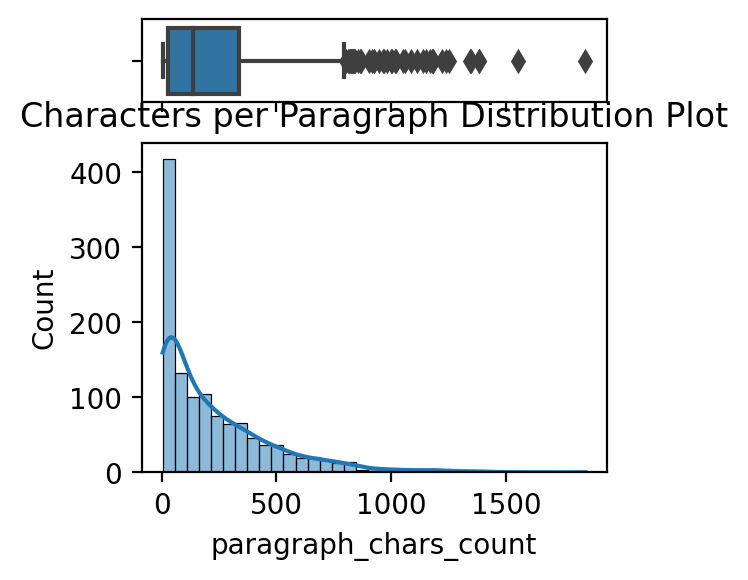

In [13]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

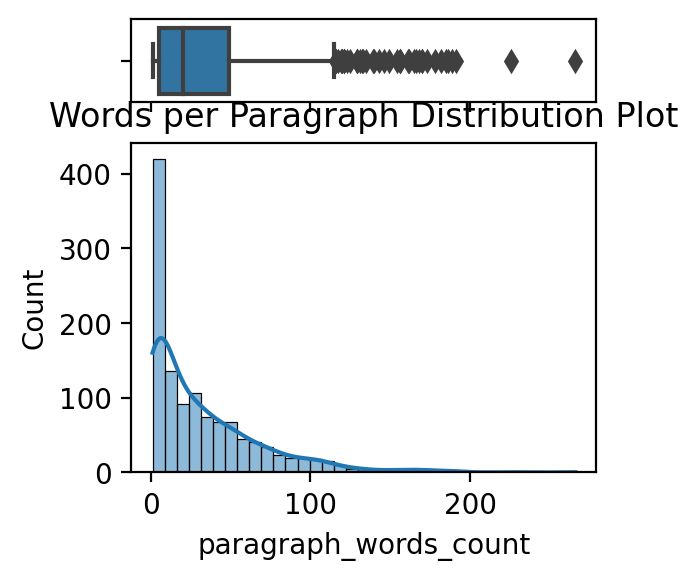

In [14]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Lenghth per Paragraph

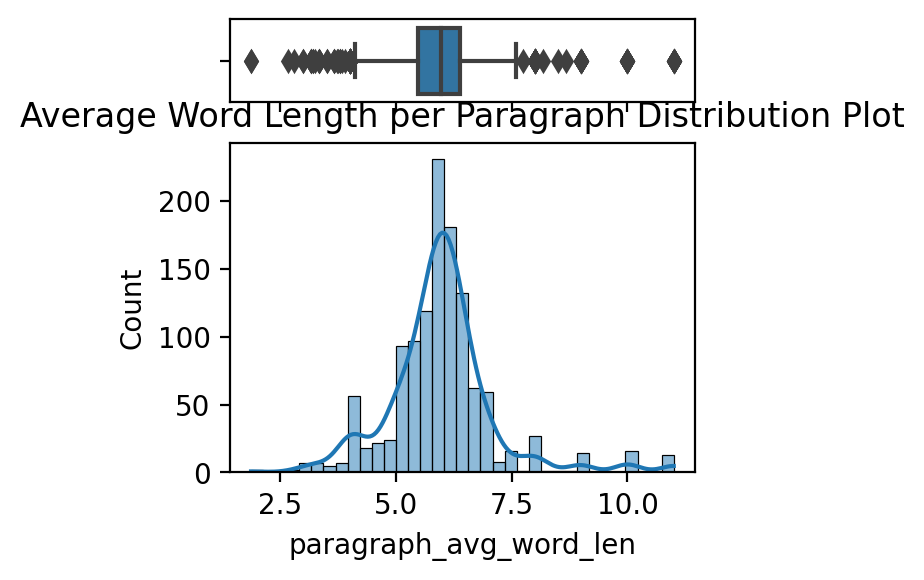

In [15]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [16]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 0 unique stop words


In [17]:
if len(stop_words_corpus.keys()) > 0:
    top_k = 25
    top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
    paragraph_analysis.plot_top_k_stop_words(
        top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [18]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 6418 unique non-stop words


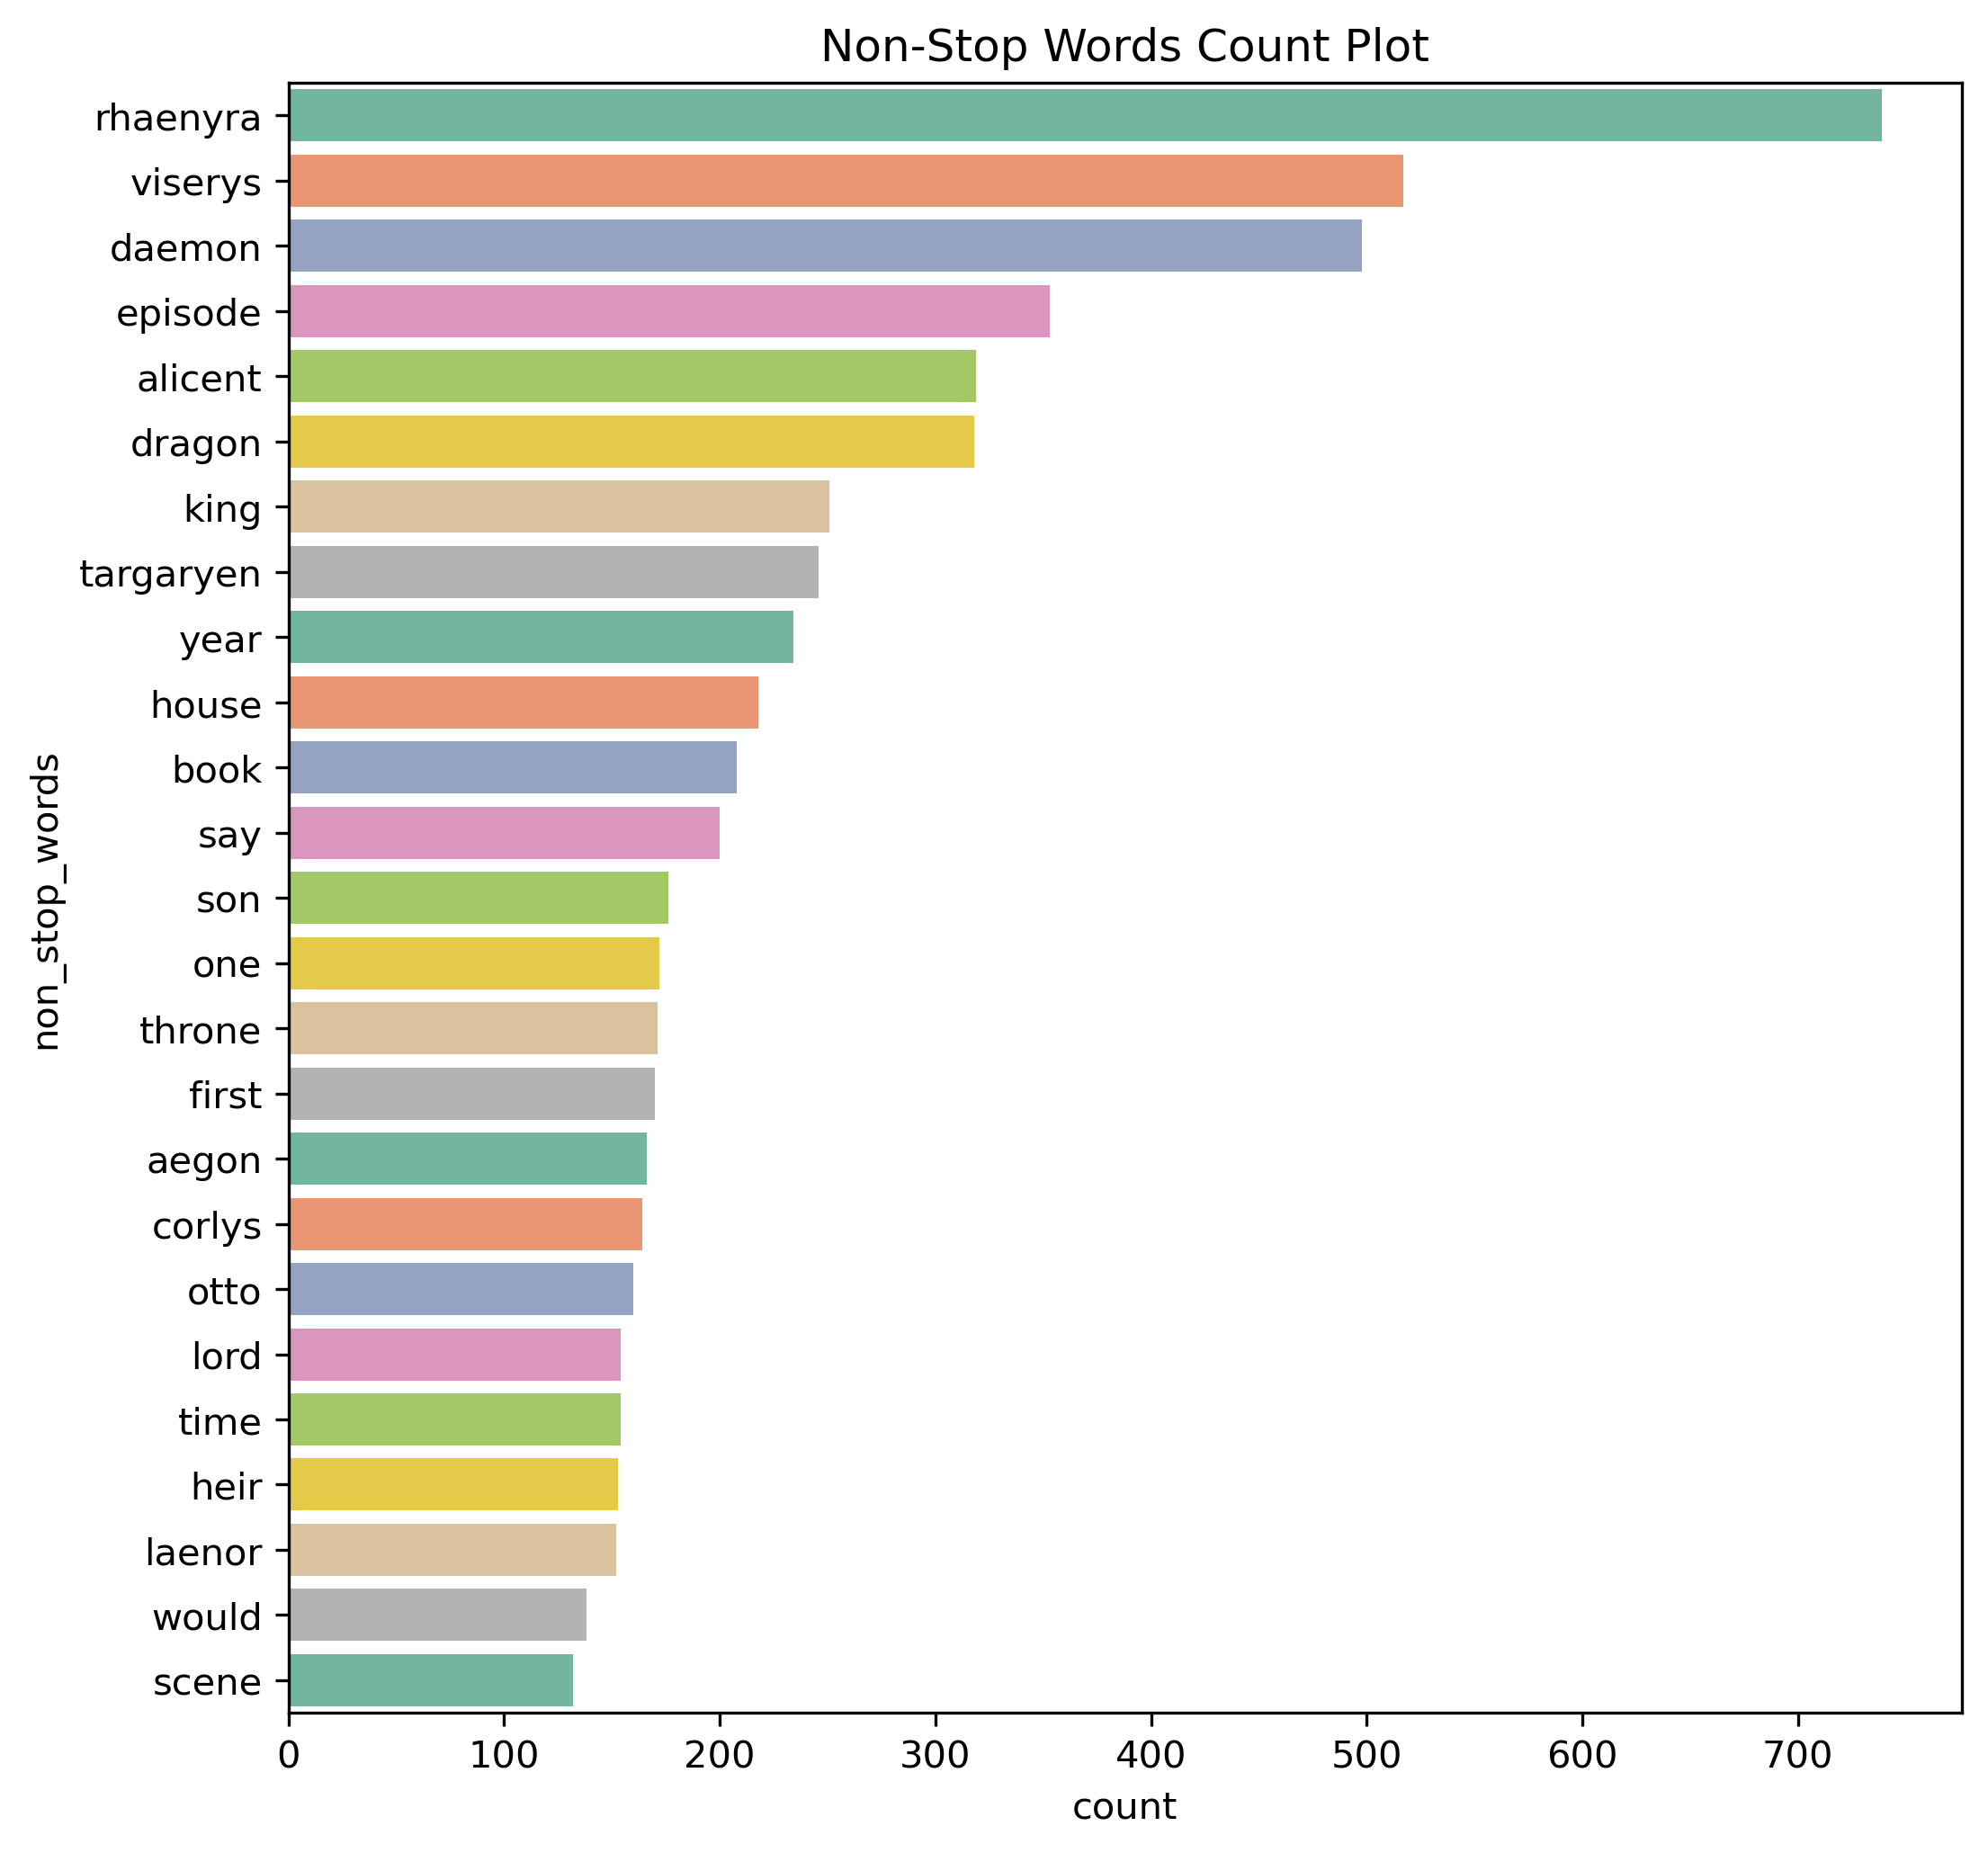

In [19]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [20]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 39887 Bigrams


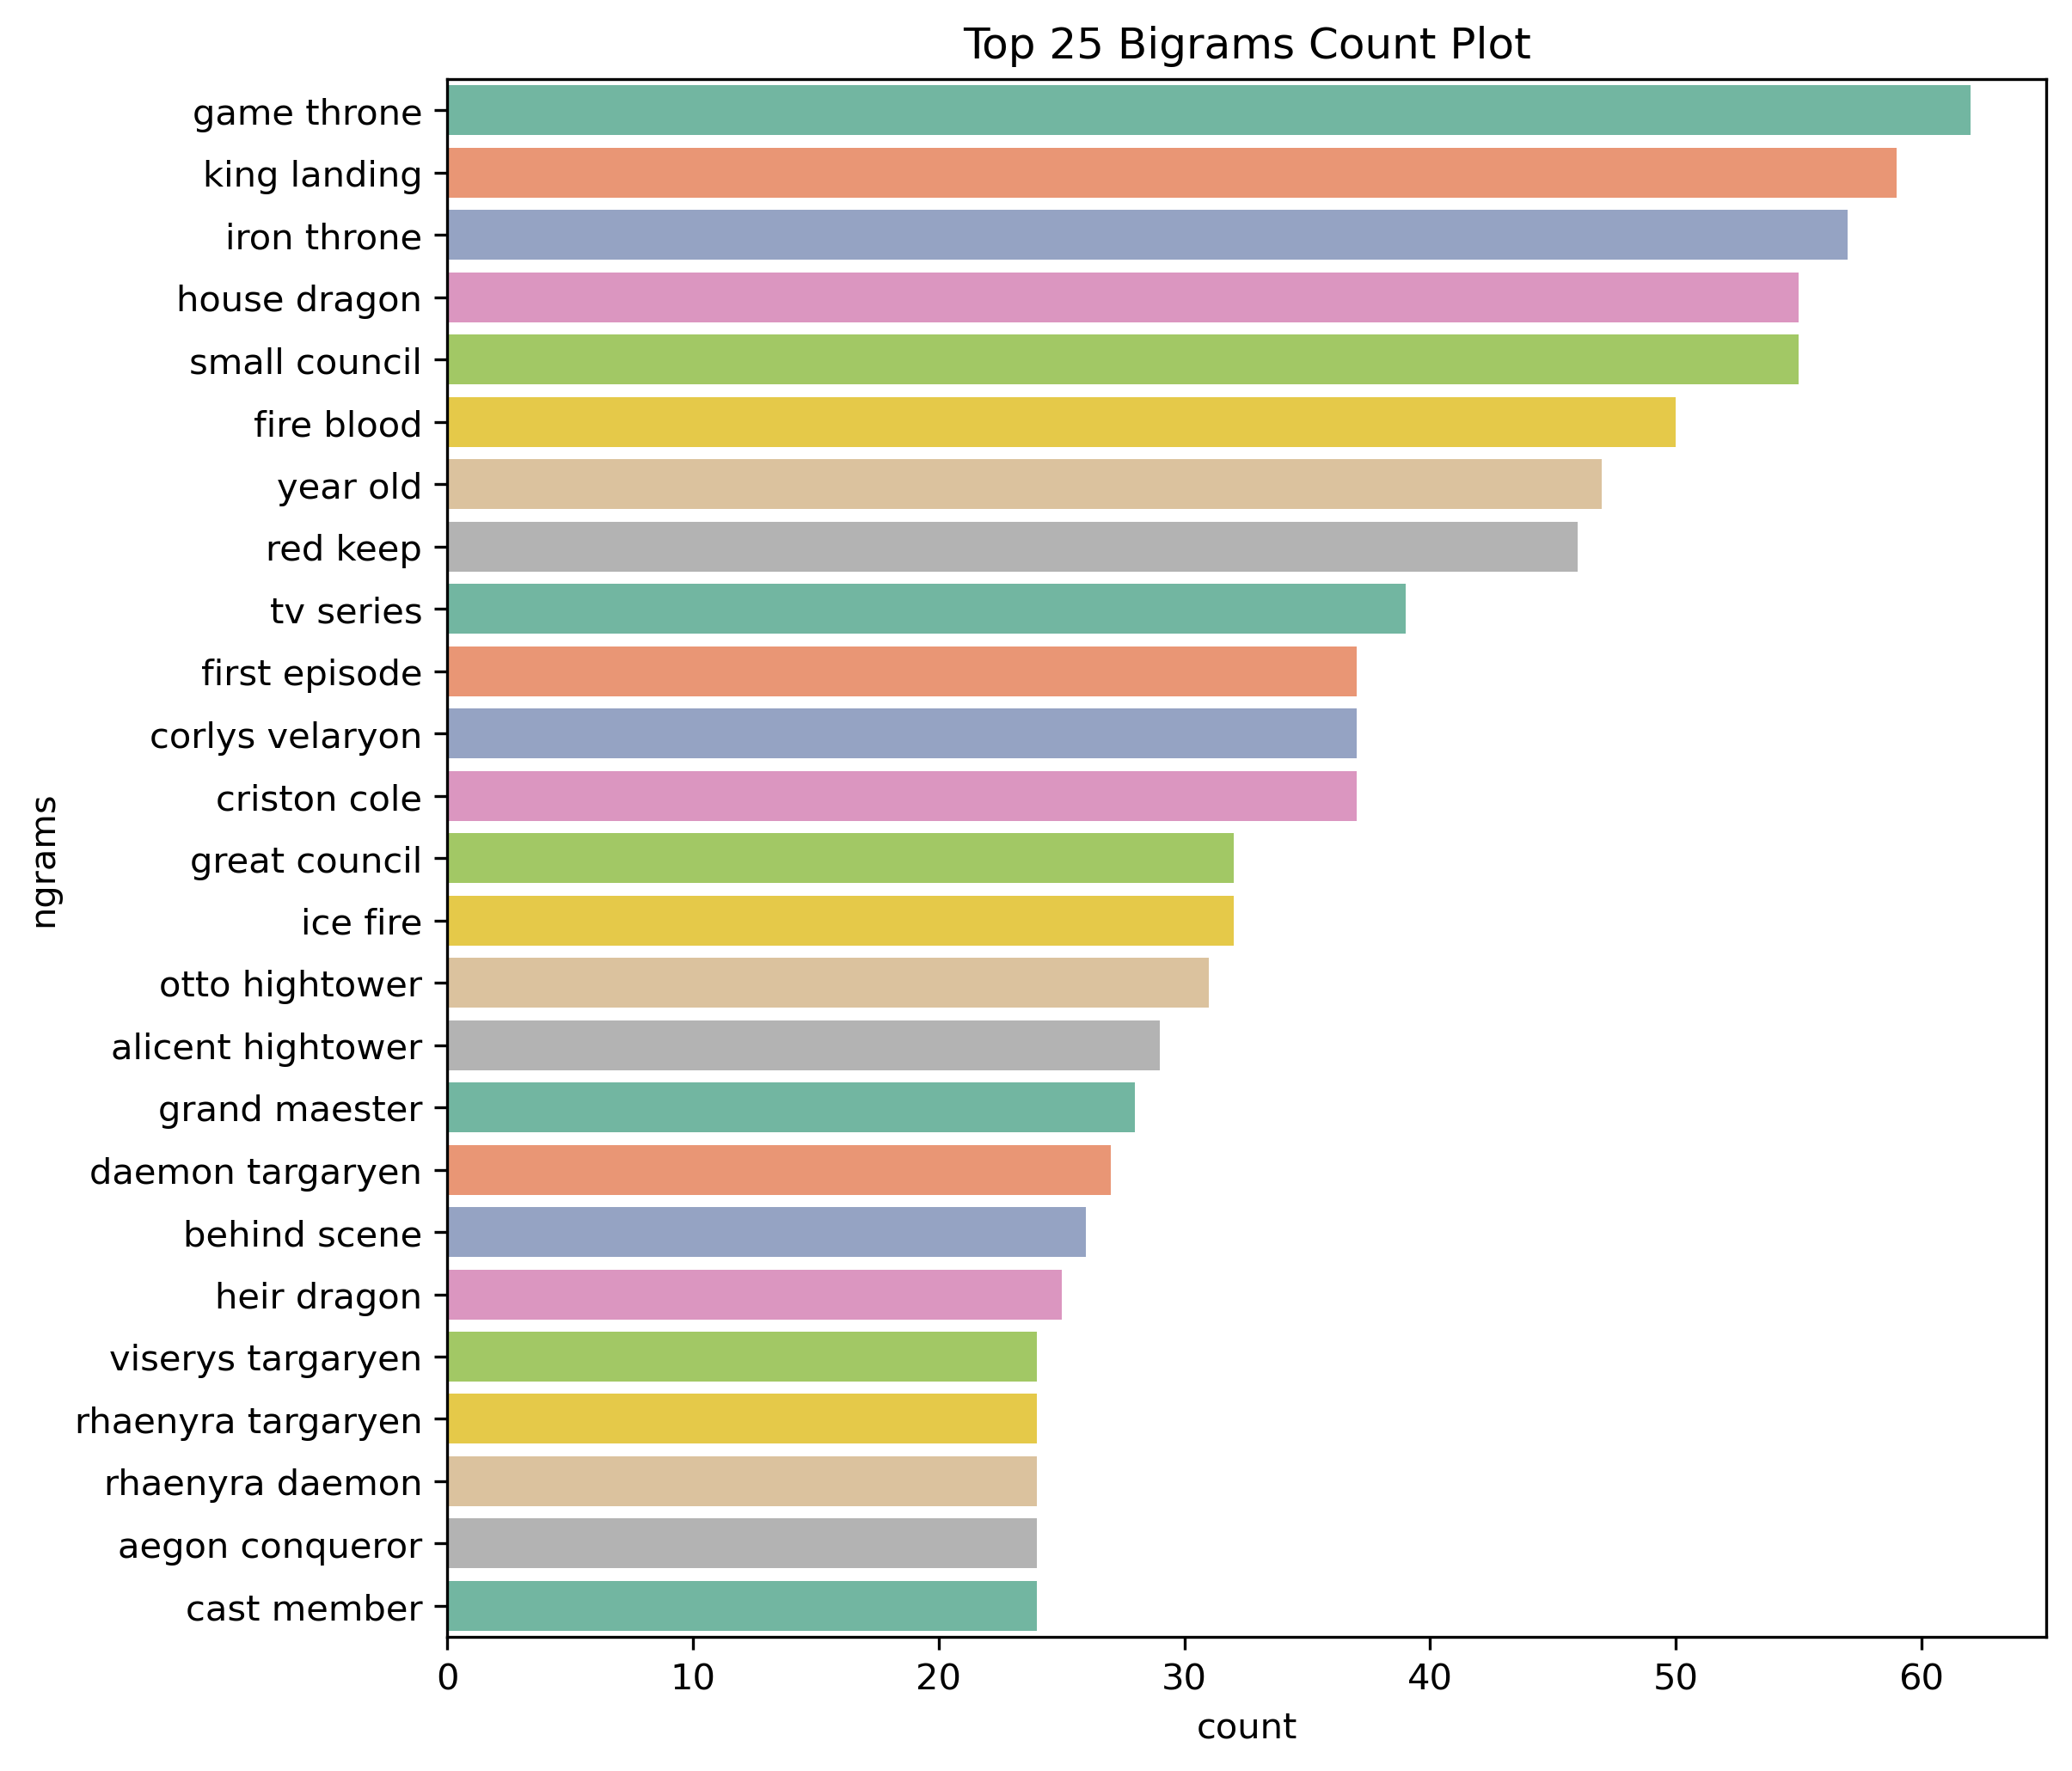

In [21]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [22]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 39886 Trigrams


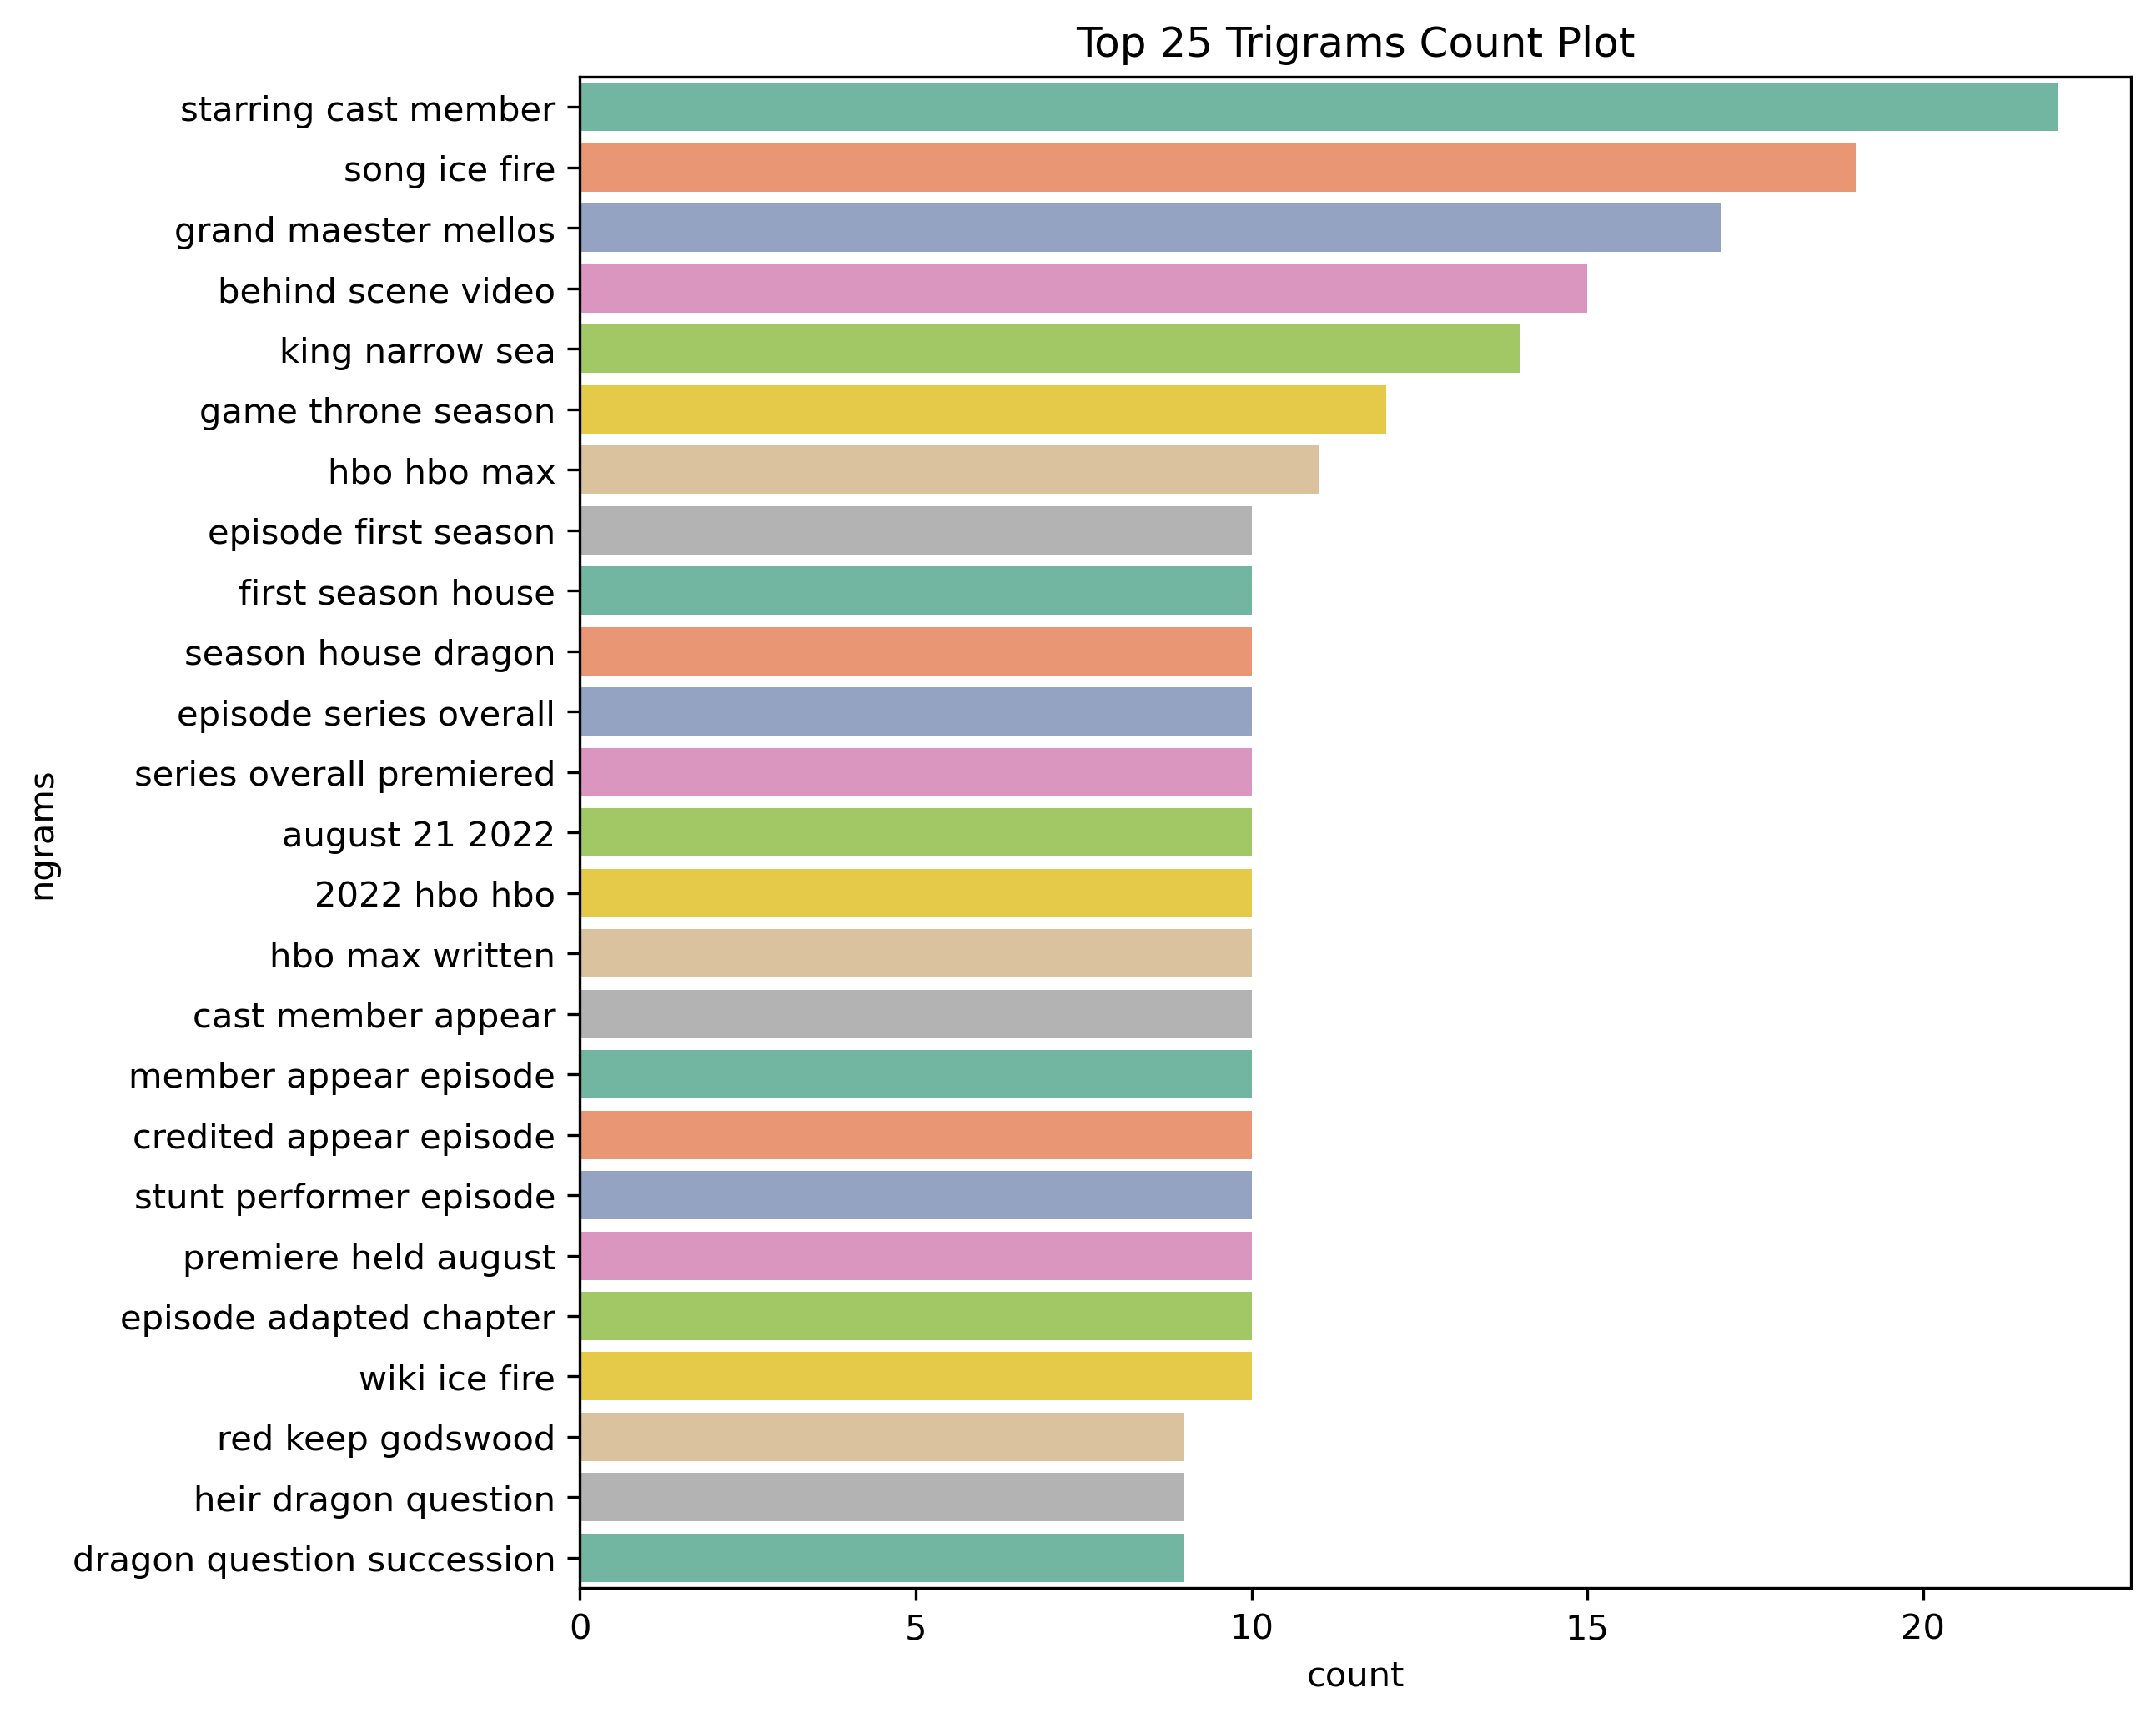

In [23]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, 
    title=f"Top {top_k} Trigrams Count Plot", 
    figsize=(8, 8), 
    dpi=300, 
    save_flag=False
)

#### LDA for Topic Extraction

In [24]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=20)

In [26]:
paragraph_analysis.extract_topics(vectorizer, lda_model, words_per_topics=30)

› Topic 0:
    › ('episode', 23.632040105859407)
    › ('location', 18.811361233238095)
    › ('filming', 15.94926841375733)
    › ('corlys', 13.034251711793026)
    › ('king', 12.973570671376262)
    › ('viserys', 11.932479696291436)
    › ('sapochnik', 11.507034217746739)
    › ('laenor', 11.050000007806554)
    › ('title', 9.931413276320894)
    › ('back', 9.424665766995457)
    › ('rhaenys', 9.050000004499841)
    › ('yaitanes', 8.795642315002151)
    › ('house', 8.229965974922688)
    › ('sea', 8.109067037727455)
    › ('child', 8.096878733266824)
    › ('mentioned', 8.050000000651945)
    › ('dragon', 8.0048491119157)
    › ('also', 7.623886812711474)
    › ('throne', 7.24804214034704)
    › ('time', 7.222979525120255)
    › ('say', 7.204849902251185)
    › ('lord', 6.62260967488485)
    › ('son', 6.606618260331587)
    › ('august', 6.504993246827379)
    › ('narrow', 6.329364376568191)
    › ('jpg', 6.050000001273789)
    › ('color', 6.05000000075605)
    › ('http', 6.0500000005